1.) Set Up Environment

In [1]:
import pandas as pd #dataframe library
import numpy as np #numeric library
import datetime as dt

#plot library
import matplotlib.pyplot as plt 
import seaborn as sns 

#evaluation library
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

#label encoder library
from sklearn.preprocessing import LabelEncoder

# for min_max scaling (Kaggle)
from mlxtend.preprocessing import minmax_scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ganti datatime
from sklearn.preprocessing import StandardScaler

# for Box-Cox Transformation
from scipy import stats

# set seed for reproducibility
np.random.seed(0)

2.) Dataset Preparation

In [2]:
# for SMP Team
smp_url = 'https://docs.google.com/spreadsheets/d/1fQjK_yvaj5yh006nRTcMXaoU0RAx8OUy2IhpZG4tNMw/edit#gid=0'
smp_data = smp_url.replace('/edit#gid=', '/export?format=csv&gid=')
smp = pd.read_csv(smp_data)

# for NS Team
ns_url = 'https://docs.google.com/spreadsheets/d/16Vrap9JRBTrq9vA-Xz-1ZkLv0GiaWZ6oETrhL4ry-Ok/edit#gid=0'
ns_data = ns_url.replace('/edit#gid=', '/export?format=csv&gid=')
ns = pd.read_csv(ns_data)

# for ITInfra Team
infra_url = 'https://docs.google.com/spreadsheets/d/1RxhtYZPFhB5F2a3434SAC6K11j_sRMhRDu5avKHMAQg/edit#gid=0'
infra_data = infra_url.replace('/edit#gid=', '/export?format=csv&gid=')
infra = pd.read_csv(infra_data)

# for Finance Team
fin_url = 'https://docs.google.com/spreadsheets/d/1F0KiwUmqIiknViTQ4Os_SdHdBVA2ErOOrSgH2Hqeumc/edit#gid=0'
fin_data = fin_url.replace('/edit#gid=', '/export?format=csv&gid=')
fin = pd.read_csv(fin_data)

3.) Merge Columns

In [3]:
# buat kolom baru di table infra
infra['payment_cat'] = ''

# looping untuk kondisi
for index, row in infra.iterrows():
    subsno_infra = row['subs_no']
    
    # cari kecocokan
    match = fin[
        (fin['subs_no'] == subsno_infra) 
    ]
    
    # copy data yang sesuai
    if not match.empty:
        infra.at[index, 'payment_cat'] = match.iloc[0]['payment_cat']

total_infra= len(infra)
print(total_infra)

43947


In [4]:
# buat kolom baru di table infra
infra['subs_key'] = ''
infra['rem_bal'] = ''
infra['rtd_amt'] = ''
infra['free_unit'] = ''
infra['usg_unit'] = ''
infra['sid'] = ''

# looping untuk kondisi
for index, row in infra.iterrows():
    servicefilter_infra = row['service_filter']
    subsno_infra = row['subs_no']
    timeno_infra = row['time_no']
    
    # cari kecocokan
    match = ns[
        (ns['service_filter'] == servicefilter_infra) &
        (ns['subs_no'] == subsno_infra) &
        (ns['time_no'] == timeno_infra)
    ]
    
    # copy data yang sesuai
    if not match.empty:
        infra.at[index, 'subs_key'] = match.iloc[0]['subs_key']
        infra.at[index, 'rem_bal'] = match.iloc[0]['rem_bal']
        infra.at[index, 'rtd_amt'] = match.iloc[0]['rtd_amt']
        infra.at[index, 'free_unit'] = match.iloc[0]['free_unit']
        infra.at[index, 'usg_unit'] = match.iloc[0]['usg_unit']
        infra.at[index, 'sid'] = match.iloc[0]['sid']

total_infra= len(infra)
print(total_infra)

43947


4.) Make a Copy 

In [5]:
data = infra.copy()

5.) Change Name and Order of Columns)

In [6]:
print(data.columns)

Index(['day_no', 'time_no', 'service_filter', 'subs_no', 'b_no',
       'event_action_code', 'prefix_dom_sk_id', 'originating_cell_id',
       'home_poc', 'city_name', 'physical_poc', 'roam_zone', 'destination_poc',
       'payment_cat', 'subs_key', 'rem_bal', 'rtd_amt', 'free_unit',
       'usg_unit', 'sid'],
      dtype='object')


In [7]:
col_name = [
    'date', #date
    'date_time' , #date and time
    'service_type', #service_type
    'subs_no', #subs_no
    'destination_no', #b_no
    'event_action_code', #event_action_code
    'prefix_domain', #prefix_dom_sk_id
    'cell_id', #originating_cell_id
    'home_poc', #home_poc
    'city_name', #city_name
    'physical_poc', #physical_poc
    'roam_zone', #roam_zone
    'destination_poc', #destination_poc
    'payment_type', #payment_cat
    'subs_id', #subs_key
    'remaining_balance', #rem_bal
    'amount_of_trx', #rtd_amt
    'free_unit', #free_unit
    'usage_unit', #usg_unit
    'sid' #sid
]

data.columns = col_name
print(data.columns)

Index(['date', 'date_time', 'service_type', 'subs_no', 'destination_no',
       'event_action_code', 'prefix_domain', 'cell_id', 'home_poc',
       'city_name', 'physical_poc', 'roam_zone', 'destination_poc',
       'payment_type', 'subs_id', 'remaining_balance', 'amount_of_trx',
       'free_unit', 'usage_unit', 'sid'],
      dtype='object')


In [8]:
order = [
    'date', #date
    'date_time' , #date and time
    'subs_no', #subs_no
    'subs_id', #subs_key
    'payment_type', #payment_cat
    'service_type', #service_type
    'destination_no', #b_no
    'event_action_code', #event_action_code
    'prefix_domain', #prefix_dom_sk_id
    'cell_id', #originating_cell_id
    'home_poc', #home_poc
    'city_name', #city_name
    'physical_poc', #physical_poc
    'roam_zone', #roam_zone
    'destination_poc', #destination_poc
    'remaining_balance', #rem_bal
    'amount_of_trx', #rtd_amt
    'free_unit', #free_unit
    'usage_unit', #usg_unit
    'sid' #sid
]

data = data[order]


6.) Dropping Un-Needed Columns

In [9]:
data = data.drop(['subs_id','destination_no','cell_id','prefix_domain','event_action_code', 'roam_zone', 'sid'], axis = 1)

In [10]:
data.head()

,date,date_time,subs_no,payment_type,service_type,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit
0,9/1/2021,9/1/2021 21:24:31,2106705274,PRE,SMSBAS,JK0,JAKARTA,KA0,JKT,673,50,0.0,1
1,9/1/2021,9/1/2021 21:29:28,2106705274,PRE,SMSBAS,JK0,JAKARTA,KA0,JKT,623,50,0.0,1
2,9/1/2021,9/1/2021 21:36:35,2106705274,PRE,SMSBAS,JK0,JAKARTA,KA0,JKT,573,50,0.0,1
3,9/1/2021,9/1/2021 7:43:24,1075588229,PRE,VASOCC,NOPOC,JAKARTA,B,0,7220,5500,0.0,1
4,9/1/2021,9/1/2021 4:24:54,1075588229,PRE,CONTEN,JK0,JAKARTA,JK0,0,101720,55,NaN,1048576


7.) Missing Values

In [11]:
missing_values_count = data.isnull().sum() + data.isin(['', ' ','00000000', None, np.nan]).sum()
missing_values_count

date                     0
date_time                0
subs_no                  0
payment_type             0
service_type             0
home_poc                 0
city_name                0
physical_poc             0
destination_poc      20229
remaining_balance        0
amount_of_trx            0
free_unit            14646
usage_unit               0
dtype: int64

In [12]:
#for free_unit
#jika free_unit memiliki nilai NULL, maka service_filter pada baris dengan nilai free_unit == NULL tersebut tidak memiliki fitur free_unit, sehingga nilai NULL harus diganti dengan nilai 0.

In [13]:
data['free_unit'] = data['free_unit'].fillna(0)
data['free_unit'] = data['free_unit'].replace(['', ' ', None], 0)

In [14]:
# for destination_poc
#00000000 --> service filter: CONTEN/VASOCC
#0 --> service filter:CONTEN/VASOCC
#(Blank) --> service filter: INTNAL/NATNAL
# so, we will fill the missing values of destination_poc with NOPOC

In [15]:
data['destination_poc'] = data['destination_poc'].fillna('NOPOC')
data['destination_poc'] = data['destination_poc'].replace(['', ' ','0', None, '00000000'], 'NOPOC')

In [16]:
missing_values_count = data.isnull().sum() + data.isin(['', ' ','00000000', None, np.nan]).sum()
missing_values_count

date                 0
date_time            0
subs_no              0
payment_type         0
service_type         0
home_poc             0
city_name            0
physical_poc         0
destination_poc      0
remaining_balance    0
amount_of_trx        0
free_unit            0
usage_unit           0
dtype: int64

8.) Data Type Check for Numerical Data 

In [17]:
data[['remaining_balance', 'amount_of_trx', 'free_unit', 'usage_unit']].dtypes

remaining_balance     object
amount_of_trx         object
free_unit            float64
usage_unit            object
dtype: object

In [18]:
def non_numeric(x):
    non_numeric_data = pd.DataFrame(data[data[x].astype(str).str.contains('[^0-9.-]')])
    return non_numeric_data

In [19]:
non_numeric('remaining_balance')

,date,date_time,subs_no,payment_type,service_type,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit
1108,9/8/2021,9/8/2021 14:36:18,545592898,PRE,CONTEN,BD0,BANDUNG,MD0,NOPOC,2425:06:00,35,0.0,3993600
1109,9/8/2021,9/8/2021 14:36:08,545592898,PRE,CONTEN,BD0,BANDUNG,MD0,NOPOC,2423:06:00,2,0.0,102400
1110,9/8/2021,9/8/2021 14:36:12,545592898,PRE,CONTEN,BD0,BANDUNG,MD0,NOPOC,2421:06:00,2,0.0,102400
1111,9/8/2021,9/8/2021 14:36:15,545592898,PRE,CONTEN,BD0,BANDUNG,MD0,NOPOC,2419:06:00,2,0.0,102400
1112,9/8/2021,9/8/2021 14:36:15,545592898,PRE,CONTEN,BD0,BANDUNG,MD0,NOPOC,2419:06:00,2,0.0,102400
1113,9/8/2021,9/8/2021 14:36:15,545592898,PRE,CONTEN,BD0,BANDUNG,MD0,NOPOC,2419:06:00,2,0.0,102400
1114,9/8/2021,9/8/2021 14:36:15,545592898,PRE,CONTEN,BD0,BANDUNG,MD0,NOPOC,2419:06:00,2,0.0,102400


In [20]:
# delete
def non_numeric(x):
    non_numeric_mask = data[x].astype(str).str.contains('[^0-9.-]')
    data.drop(data[non_numeric_mask].index, inplace=True)
    return data

non_numeric('remaining_balance')

,date,date_time,subs_no,payment_type,service_type,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit
0,9/1/2021,9/1/2021 21:24:31,2106705274,PRE,SMSBAS,JK0,JAKARTA,KA0,JKT,673,50,0.0,1
1,9/1/2021,9/1/2021 21:29:28,2106705274,PRE,SMSBAS,JK0,JAKARTA,KA0,JKT,623,50,0.0,1
2,9/1/2021,9/1/2021 21:36:35,2106705274,PRE,SMSBAS,JK0,JAKARTA,KA0,JKT,573,50,0.0,1
3,9/1/2021,9/1/2021 7:43:24,1075588229,PRE,VASOCC,NOPOC,JAKARTA,B,NOPOC,7220,5500,0.0,1
4,9/1/2021,9/1/2021 4:24:54,1075588229,PRE,CONTEN,JK0,JAKARTA,JK0,NOPOC,101720,55,0.0,1048576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43942,4/30/2022,4/30/2022 18:22:21,712325998,PRE,NATNAL,JK0,JAKARTA,BD6,BDG,2206,3950,0.0,2460
43943,4/30/2022,4/30/2022 7:49:52,712325998,PRE,NATNAL,JK0,JAKARTA,BD6,BDG,6788,346,0.0,470
43944,4/30/2022,4/30/2022 20:39:32,1182349800,PRE,CONTEN,JK0,JAKARTA,SB0,NOPOC,1567,668,0.0,34201600
43945,4/30/2022,4/30/2022 11:27:42,1182349800,PRE,CONTEN,JK0,JAKARTA,SB0,NOPOC,5415,6,0.0,307200


In [21]:
# recheck
def non_numeric(x):
    non_numeric_data = pd.DataFrame(data[data[x].astype(str).str.contains('[^0-9.-]')])
    return non_numeric_data

non_numeric('remaining_balance')

,date,date_time,subs_no,payment_type,service_type,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit


In [22]:
non_numeric('amount_of_trx')

,date,date_time,subs_no,payment_type,service_type,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit


In [23]:
non_numeric('free_unit')

,date,date_time,subs_no,payment_type,service_type,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit


In [24]:
non_numeric('usage_unit')

,date,date_time,subs_no,payment_type,service_type,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit


In [25]:
data['amount_of_trx'] = data['amount_of_trx'].astype(float)
data['remaining_balance'] = data['remaining_balance'].astype(float)
data['usage_unit'] = data['usage_unit'].astype(float)

9.) Split Time from 'date_time' Column

In [26]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['date'] = pd.to_datetime(data['date'])

In [27]:
#drop the date column
#data = data.drop(['date'], axis = 1)

In [28]:
#create separate column 
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['day_name'] = data['date_time'].dt.day_name()
data['month_name'] = data ['date_time'].dt.month_name()
data['hour'] = data['date_time'].dt.hour
#data['minute'] = data['date_time'].dt.minute

In [29]:
order = [
    'date_time',
    'date',
    'year',
    'month',
    'month_name',
    'day',
    'day_name',
    'hour',
    'service_type',
    'payment_type',
    'subs_no',
    'home_poc',
    'city_name',
    'physical_poc',
    'destination_poc',
    'remaining_balance',
    'amount_of_trx',
    'free_unit',
    'usage_unit'
]

data = data[order]

In [30]:
servicetype_code = []

LE = LabelEncoder()
LE.fit(data['service_type'])
data['servicetype_code'] = LE.transform(data['service_type'])

C:\Users\Kayla\AppData\Local\Temp\ipykernel_32292\2202312113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['servicetype_code'] = LE.transform(data['service_type'])


In [31]:
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} ")

date_time: 40979 
date: 211 
year: 2 
month: 6 
month_name: 6 
day: 31 
day_name: 7 
hour: 24 
service_type: 7 
payment_type: 2 
subs_no: 861 
home_poc: 111 
city_name: 107 
physical_poc: 101 
destination_poc: 136 
remaining_balance: 24880 
amount_of_trx: 1986 
free_unit: 152 
usage_unit: 1605 
servicetype_code: 7 


In [32]:
data.head()

,date_time,date,year,month,month_name,day,day_name,hour,service_type,payment_type,subs_no,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit,servicetype_code
0,2021-09-01 21:24:31,2021-09-01,2021,9,September,1,Wednesday,21,SMSBAS,PRE,2106705274,JK0,JAKARTA,KA0,JKT,673.0,50.0,0.0,1.0,3
1,2021-09-01 21:29:28,2021-09-01,2021,9,September,1,Wednesday,21,SMSBAS,PRE,2106705274,JK0,JAKARTA,KA0,JKT,623.0,50.0,0.0,1.0,3
2,2021-09-01 21:36:35,2021-09-01,2021,9,September,1,Wednesday,21,SMSBAS,PRE,2106705274,JK0,JAKARTA,KA0,JKT,573.0,50.0,0.0,1.0,3
3,2021-09-01 07:43:24,2021-09-01,2021,9,September,1,Wednesday,7,VASOCC,PRE,1075588229,NOPOC,JAKARTA,B,NOPOC,7220.0,5500.0,0.0,1.0,6
4,2021-09-01 04:24:54,2021-09-01,2021,9,September,1,Wednesday,4,CONTEN,PRE,1075588229,JK0,JAKARTA,JK0,NOPOC,101720.0,55.0,0.0,1048576.0,0


DATA PREPARATION FOR MACHINE LEARNING -------------------------------------------------------------------------------

1.) Categorizing Time

In [33]:
data = data.drop(['date', 'date_time', 'month_name','servicetype_code'], axis = 1)

In [34]:
data.head()

,year,month,day,day_name,hour,service_type,payment_type,subs_no,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit
0,2021,9,1,Wednesday,21,SMSBAS,PRE,2106705274,JK0,JAKARTA,KA0,JKT,673.0,50.0,0.0,1.0
1,2021,9,1,Wednesday,21,SMSBAS,PRE,2106705274,JK0,JAKARTA,KA0,JKT,623.0,50.0,0.0,1.0
2,2021,9,1,Wednesday,21,SMSBAS,PRE,2106705274,JK0,JAKARTA,KA0,JKT,573.0,50.0,0.0,1.0
3,2021,9,1,Wednesday,7,VASOCC,PRE,1075588229,NOPOC,JAKARTA,B,NOPOC,7220.0,5500.0,0.0,1.0
4,2021,9,1,Wednesday,4,CONTEN,PRE,1075588229,JK0,JAKARTA,JK0,NOPOC,101720.0,55.0,0.0,1048576.0


2.) Data Correlation

In [35]:
LE = LabelEncoder()
data['day_name'] = LE.fit_transform(data['day_name'])
data['service_type'] = LE.fit_transform(data['service_type'])
data['payment_type'] = LE.fit_transform(data['payment_type'])
data['home_poc'] = LE.fit_transform(data['home_poc'])
data['city_name'] = LE.fit_transform(data['city_name'])
data['physical_poc'] = LE.fit_transform(data['physical_poc'])
data['destination_poc'] = LE.fit_transform(data['destination_poc'])


In [36]:
data.head()

,year,month,day,day_name,hour,service_type,payment_type,subs_no,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit
0,2021,9,1,6,21,3,1,2106705274,34,24,39,43,673.0,50.0,0.0,1.0
1,2021,9,1,6,21,3,1,2106705274,34,24,39,43,623.0,50.0,0.0,1.0
2,2021,9,1,6,21,3,1,2106705274,34,24,39,43,573.0,50.0,0.0,1.0
3,2021,9,1,6,7,6,1,1075588229,77,24,2,90,7220.0,5500.0,0.0,1.0
4,2021,9,1,6,4,0,1,1075588229,34,24,33,90,101720.0,55.0,0.0,1048576.0


Axes(0.125,0.11;0.62x0.77)


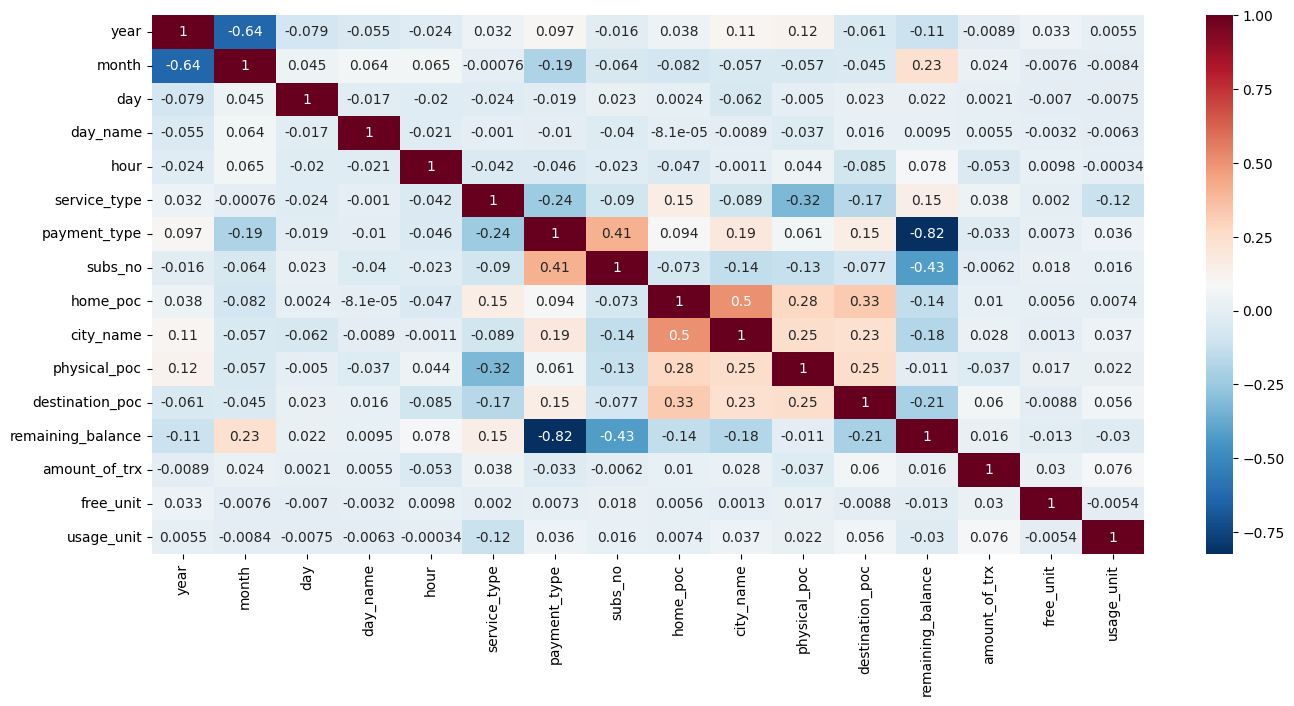

In [37]:
plt.figure(figsize = (16,7))
corr_plot = sns.heatmap(data.corr(),cmap="RdBu_r", annot=True)
print(corr_plot)

Scaling

In [38]:
# initialize the MinMaxScaler object
scaler = MinMaxScaler()

# select the columns to be scaled
cols_to_scale = ['remaining_balance', 'amount_of_trx', 'free_unit', 'usage_unit']

# fit the scaler on the selected columns
scaler.fit(data[cols_to_scale])

# transform the selected columns using the scaler
data[cols_to_scale] = scaler.transform(data[cols_to_scale])

# view the scaled DataFrame
print(data)

       year  month  day  day_name  hour  service_type  payment_type   
0      2021      9    1         6    21             3             1  \
1      2021      9    1         6    21             3             1   
2      2021      9    1         6    21             3             1   
3      2021      9    1         6     7             6             1   
4      2021      9    1         6     4             0             1   
...     ...    ...  ...       ...   ...           ...           ...   
43942  2022      4   30         2    18             2             1   
43943  2022      4   30         2     7             2             1   
43944  2022      4   30         2    20             0             1   
43945  2022      4   30         2    11             0             1   
43946  2022      4   30         2    22             2             1   

          subs_no  home_poc  city_name  physical_poc  destination_poc   
0      2106705274        34         24            39               43  \
1

Decision Tree

In [39]:
# Import the necessary libraries
import pandas as pd #library untuk dataframe
import numpy as np #library untuk komputasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

In [40]:
data = data.drop(['year', 'day', 'subs_no', 'home_poc', 'physical_poc', 'destination_poc'], axis = 1)

In [41]:
X=data.drop('service_type',axis=1) #menghilangkan output dari kriteria
print(X)

       month  day_name  hour  payment_type  city_name  remaining_balance   
0          9         6    21             1         24           0.002146  \
1          9         6    21             1         24           0.002139   
2          9         6    21             1         24           0.002133   
3          9         6     7             1         24           0.003001   
4          9         6     4             1         24           0.015348   
...      ...       ...   ...           ...        ...                ...   
43942      4         2    18             1         24           0.002346   
43943      4         2     7             1         24           0.002945   
43944      4         2    20             1         24           0.002262   
43945      4         2    11             1         24           0.002765   
43946      4         2    22             1        101           0.005083   

       amount_of_trx  free_unit    usage_unit  
0           0.000463        0.0  0.0000

In [42]:
Y=data.service_type # menampilkan kolom label (output/kelas)
print(Y)

0        3
1        3
2        3
3        6
4        0
        ..
43942    2
43943    2
43944    0
43945    0
43946    2
Name: service_type, Length: 43940, dtype: int32


In [43]:
print(train_test_split)

<function train_test_split at 0x000001FDE80ACC20>


In [44]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

In [45]:
dt=DecisionTreeClassifier()

In [46]:
dt.fit(X_train,Y_train) 
#melatih data


DecisionTreeClassifier()

In [47]:
Y_pred=dt.predict(X_test)
#memprediksi disimpan di Y_pred, yang diprediksi adalah X_test

In [48]:
print('Akurasi: ',accuracy_score(Y_test,Y_pred)*100) 
#membandingkan hasil asli (Y_test) dan hasil prediksi (Y_pred)

Akurasi:  97.57624032771962


In [49]:
## convert your array into a dataframe
df = pd.DataFrame (Y_pred)

## save to xlsx file

filepath = 'Y_pred.xlsx'

df.to_excel(filepath, index=False)

In [50]:
print('Hasil:',classification_report(Y_test,Y_pred))

#membandingkan hasil asli (Y_test) dan hasil prediksi (Y_pred)

Hasil:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2972
           1       0.93      0.93      0.93       710
           2       0.95      0.96      0.95      2038
           3       0.99      0.99      0.99      2020
           4       1.00      1.00      1.00        46
           5       0.65      0.53      0.59       109
           6       0.99      0.99      0.99       893

    accuracy                           0.98      8788
   macro avg       0.93      0.91      0.92      8788
weighted avg       0.98      0.98      0.98      8788



In [51]:
print('Confusion:',confusion_matrix(Y_test,Y_pred))

Confusion: [[2971    0    1    0    0    0    0]
 [   0  659   44    0    0    5    2]
 [   3   49 1948   12    0   26    0]
 [   0    0    6 2009    0    0    5]
 [   0    0    0    0   46    0    0]
 [   0    2   43    3    0   58    3]
 [   0    0    1    8    0    0  884]]


In [52]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0) 
#max depth adalah kedalaman cabang 
#random state adalah 

# fit the model
clf_gini.fit(X_train, Y_train)
#melatih data

DecisionTreeClassifier(max_depth=7, random_state=0)

In [53]:
y_pred_gini = clf_gini.predict(X_test)

In [54]:
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(Y_test, y_pred_gini)))
#0.04f = 4 angka di belakang koma 

Model accuracy score with criterion gini index: 0.92


In [55]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
#hasil y prediksi 

array([3, 2, 6, ..., 0, 0, 2])

In [56]:
df = pd.DataFrame (y_pred_train_gini)

## save to xlsx file
filepath = 'y_pred_train_gini.xlsx'
df.to_excel(filepath, index=False)

In [57]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9260


In [58]:
# print the scores on training and test set

print('Training set score: {0:.4f}'.format(clf_gini.score(X_train, Y_train)))

print('Test set score: {0:.4f}'.format(clf_gini.score(X_test, Y_test)))

#test set score adalah untuk performa algoritma decision tree nya
#training set score adalah untuk model (gini index)

Training set score: 0.9260
Test set score: 0.9165


[Text(0.6659375, 0.9375, 'x[8] <= 0.0\ngini = 0.762\nsamples = 35152\nvalue = [11667, 2917, 8254, 8362, 147, 441, 3364]'),
 Text(0.515625, 0.8125, 'x[6] <= 0.002\ngini = 0.721\nsamples = 23810\nvalue = [326, 2917, 8253, 8362, 147, 441, 3364]'),
 Text(0.245, 0.6875, 'x[6] <= 0.0\ngini = 0.455\nsamples = 11691\nvalue = [312, 196, 3119, 8035, 0, 17, 12]'),
 Text(0.13, 0.5625, 'x[8] <= 0.0\ngini = 0.478\nsamples = 1450\nvalue = [295, 155, 993, 0, 0, 2, 5]'),
 Text(0.08, 0.4375, 'x[2] <= 3.5\ngini = 0.244\nsamples = 1142\nvalue = [0, 154, 981, 0, 0, 2, 5]'),
 Text(0.04, 0.3125, 'x[5] <= 0.002\ngini = 0.401\nsamples = 54\nvalue = [0, 39, 15, 0, 0, 0, 0]'),
 Text(0.02, 0.1875, 'x[2] <= 2.0\ngini = 0.18\nsamples = 10\nvalue = [0, 1, 9, 0, 0, 0, 0]'),
 Text(0.01, 0.0625, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0, 0, 0, 0]'),
 Text(0.03, 0.0625, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2, 0, 0, 0, 0]'),
 Text(0.06, 0.1875, 'x[4] <= 36.0\ngini = 0.236\nsamples = 44\nvalue = [0, 38, 6, 0, 0,

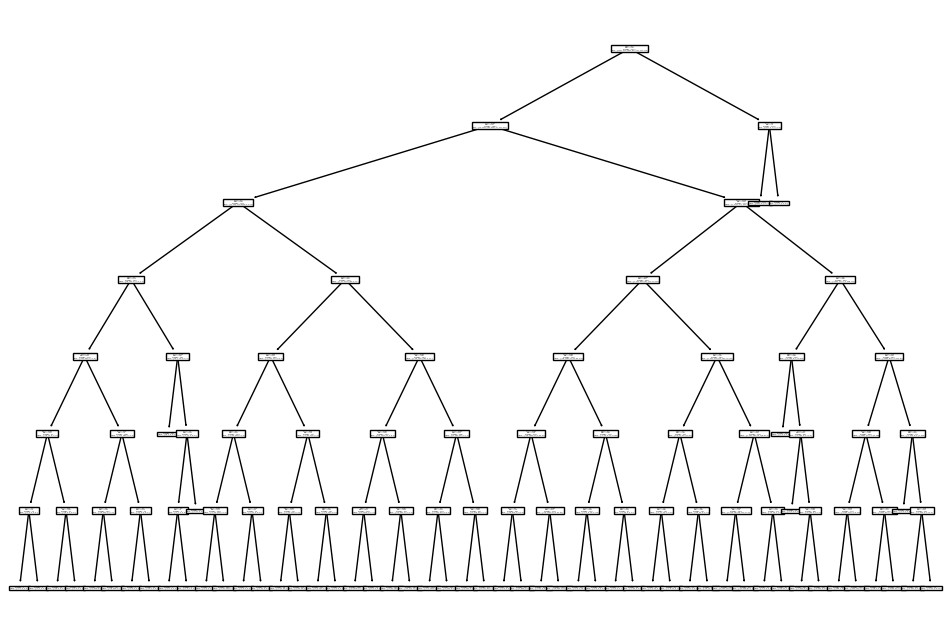

In [59]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, Y_train))

In [60]:
import pickle

In [61]:
# Menyimpan model ke dalam file
with open('model.pkl', 'wb') as f:
    pickle.dump(dt, f)

In [62]:
# Mengambil kembali model dari file
with open('model.pkl', 'rb') as f:
    dt = pickle.load(f)

10.) Count Unique

In [63]:
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} ")

month: 6 
day_name: 7 
hour: 24 
service_type: 7 
payment_type: 2 
city_name: 107 
remaining_balance: 24880 
amount_of_trx: 1986 
free_unit: 152 
usage_unit: 1605 


---------------------------------------------------------------------------------------------------

11.) Tidying Up Categorical Data for destination_poc

In [64]:
unique_values = sorted(data['destination_poc'].unique())

# Print the unique values
print(unique_values)

KeyError: 'destination_poc'

In [ ]:
# Declare categories YOGYAKARTA
categories_YG = ['YG0', 'YG1', 'YG2', 'YG3', 'YG4', 'YG5', 'YG6', 'YGY']
catcounts_YG = data[data['destination_poc'].isin(categories_YG)]['destination_poc'].value_counts()
print(catcounts_YG)

YGY    243
YG0    134
YG2     48
YG3     30
YG4     19
YG6     12
YG1     12
YG5      9
Name: destination_poc, dtype: int64


In [ ]:
# Declare categories SEMARANG
categories_SM = ['SM0', 'SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SMG']
catcounts_SM = data[data['destination_poc'].isin(categories_SM)]['destination_poc'].value_counts()
print(catcounts_SM)

SMG    882
SM0    203
SM5     59
SM2     56
SM1     25
SM3     17
SM4      8
Name: destination_poc, dtype: int64


In [ ]:
#data['destination_poc'] = data['destination_poc'].replace(['0'], 'NOPOC')
data['destination_poc'] = data['destination_poc'].replace(['AC0','AC1','ACH'],'ACEH')
data['destination_poc'] = data['destination_poc'].replace(['BD0','BD1','BD2','BD3','BD4','BD5','BD6','BD7','BD8','BD9','BDG'],'BANDUNG')
data['destination_poc'] = data['destination_poc'].replace(['BJ0','BJ1','BJ2'],'BANJARMASIN')
data['destination_poc'] = data['destination_poc'].replace(['YG0', 'YG1', 'YG2', 'YG3', 'YG4', 'YG5', 'YG6', 'YGY'],'YOGYAKARTA')
data['destination_poc'] = data['destination_poc'].replace(['SM0', 'SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SMG'],'SEMARANG')
data['destination_poc'] = data['destination_poc'].replace(['SB0', 'SB1', 'SB2', 'SB3', 'SB4', 'SBY'],'SURABAYA')
data['destination_poc'] = data['destination_poc'].replace(['PT0', 'PT2', 'PTK'],'PONTIANAK')
data['destination_poc'] = data['destination_poc'].replace(['ML0', 'ML1', 'ML2', 'ML3', 'ML4', 'ML5', 'ML6', 'MLG'],'MALANG')
data['destination_poc'] = data['destination_poc'].replace(['PL0', 'PL1', 'PL2', 'PL3', 'PL4', 'PL5', 'PL6', 'PLG'],'PALEMBANG')
data['destination_poc'] = data['destination_poc'].replace(['MK0', 'MK1', 'MK2', 'MK3', 'MKS'],'MAKASSAR')
data['destination_poc'] = data['destination_poc'].replace(['MD0', 'MD1', 'MD3', 'MD4', 'MDN'],'MEDAN')
data['destination_poc'] = data['destination_poc'].replace(['PD0', 'PD1', 'PDG'],'PADANG')
data['destination_poc'] = data['destination_poc'].replace(['DP0', 'DP1', 'DPS'],'DENPASAR')
data['destination_poc'] = data['destination_poc'].replace(['PK0', 'PK1', 'PKB'],'PEKANBARU')
data['destination_poc'] = data['destination_poc'].replace(['JM0', 'JM1', 'JM2', 'JMB'],'JAMBI')
data['destination_poc'] = data['destination_poc'].replace(['LP0', 'LP1', 'LP2', 'LPG'],'LAMPUNG')
data['destination_poc'] = data['destination_poc'].replace(['BM0', 'BM1', 'BM2'],'BATAM')
data['destination_poc'] = data['destination_poc'].replace(['BT0', 'BT1', 'BT2'],'BANTEN')
data['destination_poc'] = data['destination_poc'].replace(['BN0', 'BN1', 'BNG'],'BENGKULU')
data['destination_poc'] = data['destination_poc'].replace(['MA1', 'MA2', 'MA3'],'MADURA')
data['destination_poc'] = data['destination_poc'].replace(['BJ0', 'BJ1', 'BJ2'],'BANJARBARU')
data['destination_poc'] = data['destination_poc'].replace(['PG0', 'PG1', 'PGK'],'PALANGKARAYA')
data['destination_poc'] = data['destination_poc'].replace(['BL0', 'BL1', 'BL3', 'BLK'],'BALIKPAPAN')
data['destination_poc'] = data['destination_poc'].replace(['MN0', 'MN1', 'MND'],'MANADO')
data['destination_poc'] = data['destination_poc'].replace(['PU0','PLU'],'PALU')
data['destination_poc'] = data['destination_poc'].replace(['SK0'],'SUKABUMI')
data['destination_poc'] = data['destination_poc'].replace(['PK0',],'PEKANBARU')
data['destination_poc'] = data['destination_poc'].replace(['LB0','LB1'],'MATARAM')
data['destination_poc'] = data['destination_poc'].replace(['BK0', 'BK1'],'MATARAM')
data['destination_poc'] = data['destination_poc'].replace(['MT0', 'MT1'],'MATARAM')

In [ ]:
'BTM' 'MTB'
'JK0', 'JK1', 'JKB', 'JKT'

In [ ]:
unique_values = sorted(data['destination_poc'].unique())

# Print the unique values
print(unique_values)

['ACEH', 'BALIKPAPAN', 'BANDUNG', 'BANJARMASIN', 'BANTEN', 'BATAM', 'BENGKULU', 'BNJ', 'BTM', 'BTN', 'DENPASAR', 'IR0', 'IRN', 'JAMBI', 'JK0', 'JK1', 'JKB', 'JKT', 'KA0', 'KD0', 'KDR', 'KP0', 'LAMPUNG', 'MADURA', 'MAKASSAR', 'MALANG', 'MANADO', 'MATARAM', 'MB0', 'MB1', 'MEDAN', 'MLK', 'MTB', 'MTR', 'MU0', 'NOPOC', 'OTH', 'PADANG', 'PALANGKARAYA', 'PALEMBANG', 'PALU', 'PEKANBARU', 'PONTIANAK', 'SEMARANG', 'SUKABUMI', 'SURABAYA', 'YOGYAKARTA']


In [ ]:
data.head()

,year,month,day,day_name,hour,service_type,payment_type,subs_no,home_poc,city_name,physical_poc,destination_poc,remaining_balance,amount_of_trx,free_unit,usage_unit
0,2021,1,9,Saturday,21,SMSBAS,PRE,2106705274,JK0,JAKARTA,KA0,JKT,673.0,50.0,0.0,1.0
1,2021,1,9,Saturday,21,SMSBAS,PRE,2106705274,JK0,JAKARTA,KA0,JKT,623.0,50.0,0.0,1.0
2,2021,1,9,Saturday,21,SMSBAS,PRE,2106705274,JK0,JAKARTA,KA0,JKT,573.0,50.0,0.0,1.0
3,2021,1,9,Saturday,7,VASOCC,PRE,1075588229,NOPOC,JAKARTA,B,NOPOC,7220.0,5500.0,0.0,1.0
4,2021,1,9,Saturday,4,CONTEN,PRE,1075588229,JK0,JAKARTA,JK0,NOPOC,101720.0,55.0,0.0,1048576.0


12.) Tidying Up Categorical Data for home_poc

In [ ]:
unique_home = sorted(data['home_poc'].unique())

# Print the unique values
print(unique_home)

['AC0', 'AC1', 'AC3', 'AC4', 'BD0', 'BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BDG', 'BJ0', 'BJ1', 'BJ2', 'BK0', 'BK1', 'BK2', 'BL0', 'BL1', 'BL2', 'BM0', 'BM1', 'BM2', 'BN1', 'BT0', 'BT1', 'BT2', 'DP0', 'DP1', 'IR1', 'JK0', 'JK1', 'JKT', 'JM0', 'JM1', 'JM2', 'KA0', 'KD0', 'KD1', 'KD2', 'KP0', 'LB0', 'LB1', 'LP0', 'LP1', 'LP4', 'MA1', 'MA2', 'MA3', 'MB0', 'MB1', 'MD0', 'MD1', 'MD2', 'MD3', 'MD4', 'MD5', 'MK0', 'MK1', 'MK2', 'MK3', 'ML0', 'ML1', 'ML2', 'ML3', 'ML4', 'ML5', 'MN0', 'MN1', 'MN2', 'MT0', 'MT1', 'MU0', 'NOPOC', 'PD0', 'PG0', 'PG1', 'PK0', 'PK1', 'PL0', 'PL1', 'PL2', 'PL3', 'PL5', 'PT0', 'PU0', 'SB0', 'SB1', 'SB2', 'SB3', 'SB4', 'SK0', 'SM0', 'SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SMG', 'YG0', 'YG1', 'YG2', 'YG3', 'YG4', 'YG5', 'YG6', 'YG7']


In [ ]:
unique_home = sorted(data['home_poc'].unique())

# Print the unique values
print(unique_home)

['ACEH', 'BALIKPAPAN', 'BANDUNG', 'BANJARMASIN', 'BANTEN', 'BATAM', 'BENGKULU', 'DENPASAR', 'JAKARTA', 'JAMBI', 'KARAWANG', 'KENDARI', 'KP0', 'LAMPUNG', 'LB0', 'LB1', 'MADURA', 'MAKASSAR', 'MALANG', 'MANADO', 'MB0', 'MB1', 'MEDAN', 'MN2', 'MT0', 'MT1', 'MU0', 'NOPOC', 'PADANG', 'PALANGKARAYA', 'PALEMBANG', 'PANGKAL PINANG', 'PEKANBARU', 'PONTIANAK', 'PU0', 'SEMARANG', 'SK0', 'SORONG', 'SURABAYA', 'YOGYAKARTA']


In [ ]:
data['home_poc'] = data['home_poc'].replace(['0'], 'NOPOC')
data['home_poc'] = data['home_poc'].replace(['AC0','AC1','AC3', 'AC4'],'ACEH')
data['home_poc'] = data['home_poc'].replace(['BD0','BD1','BD2','BD3','BD4','BD5','BD6','BD7','BD8','BD9','BDG'],'BANDUNG')
data['home_poc'] = data['home_poc'].replace(['BJ0','BJ1','BJ2'],'BANJARMASIN')
data['home_poc'] = data['home_poc'].replace(['YG0', 'YG1', 'YG2', 'YG3', 'YG4', 'YG5', 'YG6', 'YG7','YGY'],'YOGYAKARTA')
data['home_poc'] = data['home_poc'].replace(['SM0', 'SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SMG'],'SEMARANG')
data['home_poc'] = data['home_poc'].replace(['SB0', 'SB1', 'SB2', 'SB3', 'SB4', 'SBY'],'SURABAYA')
data['home_poc'] = data['home_poc'].replace(['PT0', 'PT2', 'PTK'],'PONTIANAK')
data['home_poc'] = data['home_poc'].replace(['ML0', 'ML1', 'ML2', 'ML3', 'ML4', 'ML5', 'ML6', 'MLG'],'MALANG')
data['home_poc'] = data['home_poc'].replace(['PL0', 'PL1', 'PL2', 'PL3', 'PL4', 'PL5', 'PL6', 'PLG'],'PALEMBANG')
data['home_poc'] = data['home_poc'].replace(['MK0', 'MK1', 'MK2', 'MK3', 'MKS'],'MAKASSAR')
data['home_poc'] = data['home_poc'].replace(['MD0', 'MD1', 'MD2','MD3', 'MD4', 'MD5','MDN'],'MEDAN')
data['home_poc'] = data['home_poc'].replace(['PD0', 'PD1', 'PDG'],'PADANG')
data['home_poc'] = data['home_poc'].replace(['DP0', 'DP1', 'DPS'],'DENPASAR')
data['home_poc'] = data['home_poc'].replace(['PK0', 'PK1', 'PKB'],'PEKANBARU')
data['home_poc'] = data['home_poc'].replace(['JM0', 'JM1', 'JM2', 'JMB'],'JAMBI')
data['home_poc'] = data['home_poc'].replace(['LP0', 'LP1', 'LP2','LP4', 'LPG'],'LAMPUNG')
data['home_poc'] = data['home_poc'].replace(['BM0', 'BM1', 'BM2'],'BATAM')
data['home_poc'] = data['home_poc'].replace(['BT0', 'BT1', 'BT2'],'BANTEN')
data['home_poc'] = data['home_poc'].replace(['BN0', 'BN1', 'BNG'],'BENGKULU')
data['home_poc'] = data['home_poc'].replace(['MA1', 'MA2', 'MA3'],'MADURA')
data['home_poc'] = data['home_poc'].replace(['BJ0', 'BJ1', 'BJ2'],'BANJARBARU')
data['home_poc'] = data['home_poc'].replace(['PG0', 'PG1', 'PGK'],'PALANGKARAYA')
data['home_poc'] = data['home_poc'].replace(['BL0', 'BL1','BL2','BL3', 'BLK'],'BALIKPAPAN')
data['home_poc'] = data['home_poc'].replace(['MN0', 'MN1', 'MND'],'MANADO')
data['home_poc'] = data['home_poc'].replace(['BK0', 'BK1', 'BK2'],'PANGKAL PINANG')
data['home_poc'] = data['home_poc'].replace(['JK0', 'JK1', 'JKT'],'JAKARTA')
data['home_poc'] = data['home_poc'].replace(['KD0', 'KD1', 'KD2'],'KENDARI')
data['home_poc'] = data['home_poc'].replace(['KA0'],'KARAWANG')
data['home_poc'] = data['home_poc'].replace(['IR1'],'SORONG')
data['home_poc'] = data['home_poc'].replace(['MB0','MB1'],'MALANG')